### Goal of community detection

**Community detection, also called graph partition, is about identifying modules and their boundaries, which allows for a classification of vertices, according to their structural position in the modules.** So, vertices with a central position in their clusters, i. e. sharing a large number of edges with the other group partners, may have an important function of control and stability within the group;

**Benefits**:

- Community detection helps us to reveal the hidden relations among the nodes in the network.
- Detecting communities in a network is one of the most important tasks in network analysis. 
- In a large scale network, such as an online social network, we could have millions of nodes and edges. Detecting communities in such networks becomes a herculean task.

### Perfect community detection

In [1]:
from IPython.display import display
from PIL import Image

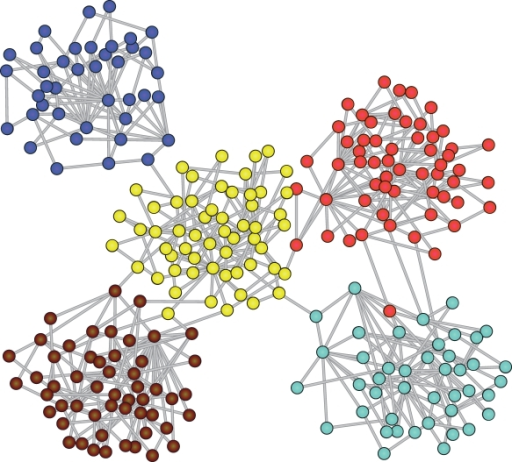

In [2]:
# community detection

path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\community-detection.png"
display(Image.open(path))

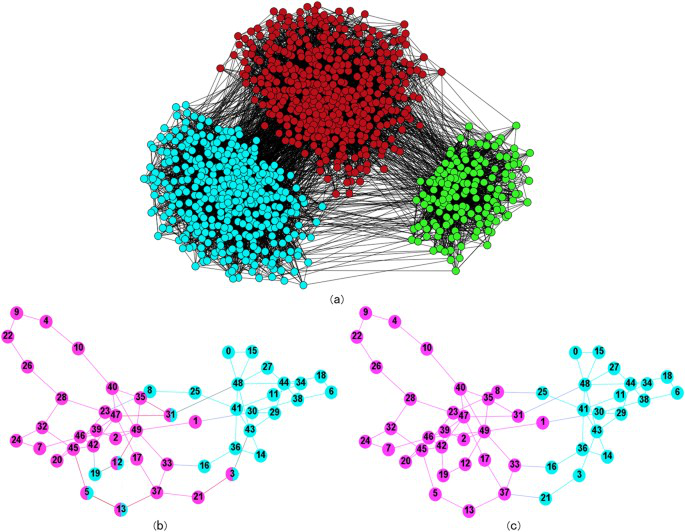

In [3]:
# community detection example

path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\community-detection2.png"
display(Image.open(path))

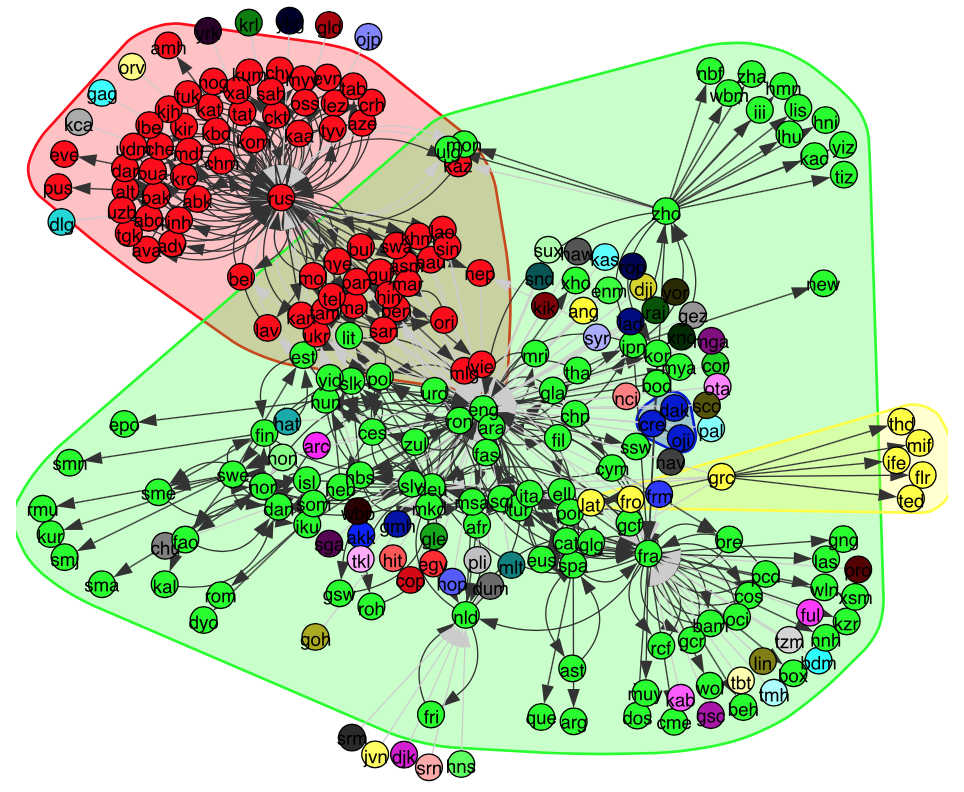

In [4]:
# community detection example

path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\community-detection3.png"
display(Image.open(path))

## Algorithms

1. Edge betweenness (Girvan–Newman)
2. Modularity maximization
3. Label propagation
4. Fast community unfolding (Louvian)
5. Walktrap
6. k-clique community

### 1. Girvan–Newman

**The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph.** The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed and the result can be depicted as a dendrogram.

We are going to divide the nodes of the graph into two or more communities using the Girvan Newman algorithm. The Girvan Newman Algorithm removes the edges with the highest betweenness until there are no edges remain. Betweenness is the number of the shortest paths between pairs of nodes that run through it.

Algorithm:

1. Create a graph of N nodes and its edges or take an inbuilt graph like a barbell graph.
2. Calculate the betweenness of all existed edges in the graph.
3. Now remove all the edge(s) with the highest betweenness.
4. Now recalculate the betweenness of all the edges that got affected by the removal of edges.
5. Now repeat steps 3 and 4 until no edges remain.

Reference: **Community structure in social and biological networks**

https://arxiv.org/abs/cond-mat/0112110

### Example

In [5]:
# Import libraries
import pandas as pd
import networkx as nx

# for community detection
from networkx.algorithms import community
import community as community_louvain
import igraph as ig
import networkx.algorithms.community as nxcom
from networkx.algorithms.community.centrality import girvan_newman # no. one

# for visualization
from matplotlib import pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
%matplotlib inline
from matplotlib import pyplot as plt

# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

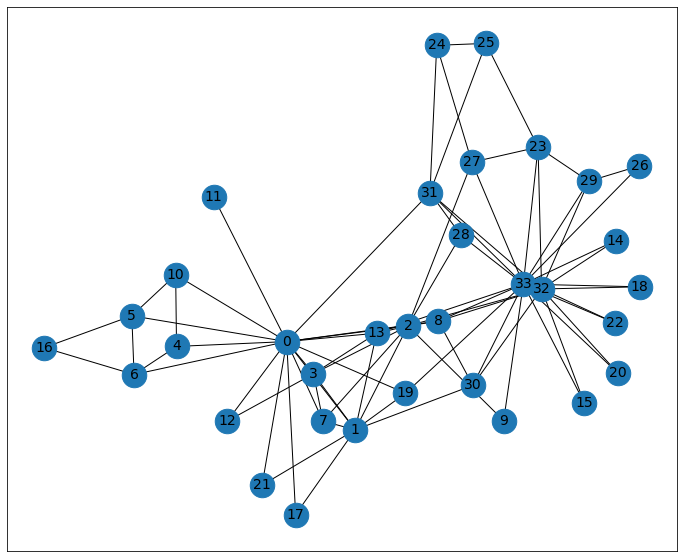

In [6]:
G_karate = nx.karate_club_graph()
plt.figure(7,figsize=(12,10))
nx.draw_networkx(G_karate,node_size=600,font_size=14)

In [7]:
# check nodes
G_karate.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [8]:
# check edges
G_karate.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [12]:
# Find the communities
# Using: "greedy_modularity_communities" module
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)

# Count the communities
print(f"The karate club has {len(communities)} communities.")

The karate club has 3 communities.


### Example

In [60]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [61]:
G_karate = nx.karate_club_graph()

# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)

# Count the communities
print(f"The karate club has {len(communities)} communities.")

The karate club has 3 communities.


The output of the community detection consists of sets of vertex numbers (set of sets). If we wish to visualize this we need to define a few utilities. The methods simply assign the community number to the nodes and edges:

In [62]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

With this we now assign the community info to the elements:

In [63]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

A little plot now gives a better idea of how the karate club communities are:

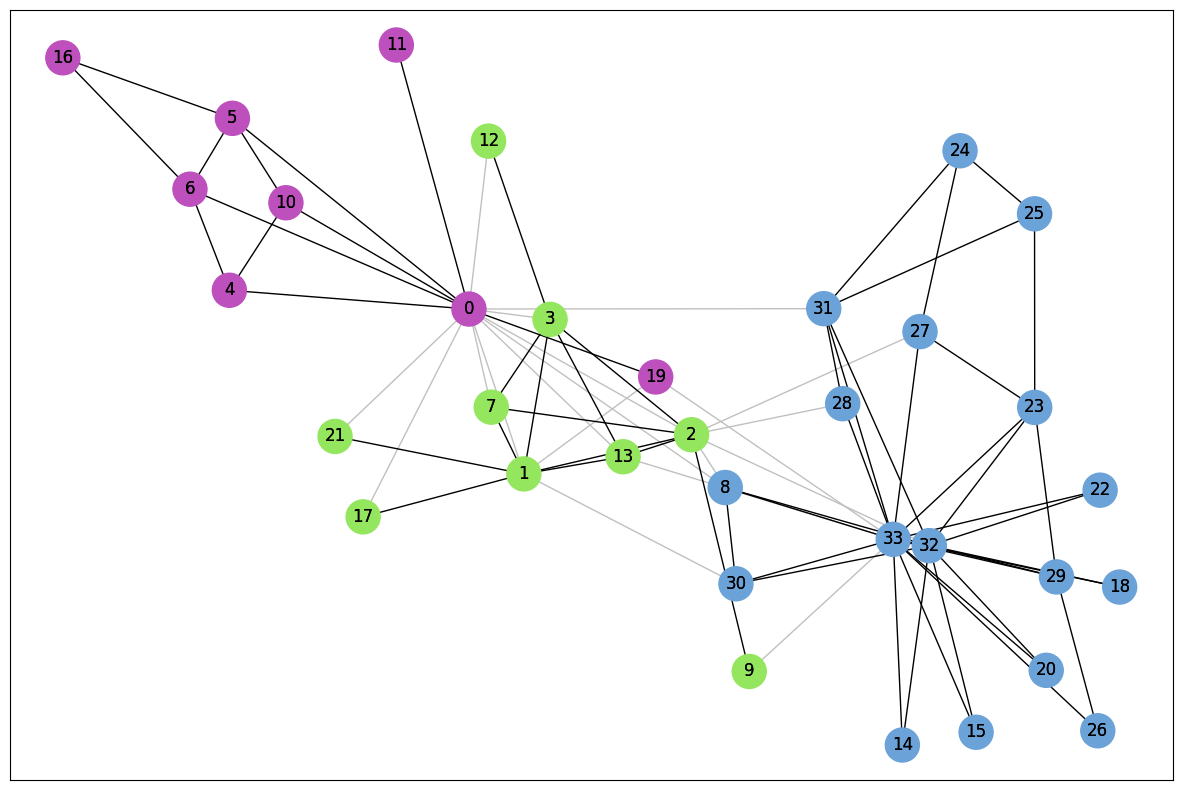

In [65]:
karate_pos = nx.spring_layout(G_karate)

plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    node_size=600,
    edge_color=internal_color)
plt.show()

### Example

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


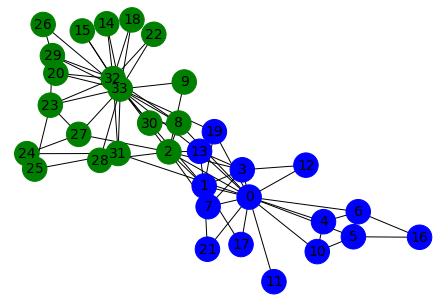

In [20]:
G = nx.karate_club_graph()

# Using "girvan_newman module"
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')  
nx.draw(G,node_size=600,font_size=14, node_color=color_map, with_labels=True)
plt.show()

The network has been divided into two distinct communities:

In [21]:
len(node_groups)

2

In [22]:
# Modularity for different communities
# Modularity is the fraction of the edges that fall within the given groups minus the expected such fraction ...
# if edges were distributed at random.
modularity = []
for x in communities:
  modularity.append(community.modularity(G, x))
modularity

[0.34878369493754113,
 0.3632478632478633,
 0.40129848783694944,
 0.3925049309664695,
 0.37623274161735704,
 0.3583168967784353,
 0.341715976331361,
 0.3247863247863249,
 0.3159105851413545,
 0.29865220249835644,
 0.28040762656147267,
 0.2628205128205128,
 0.2475345167652859,
 0.22682445759368827,
 0.20890861275476652,
 0.18984220907297825,
 0.18129520052596965,
 0.16009204470742933,
 0.14694280078895464,
 0.12031558185404344,
 0.10815253122945427,
 0.09064760026298486,
 0.08029257067718604,
 0.06993754109138725,
 0.05785667324128863,
 0.03418803418803419,
 0.022024983563445122,
 -0.002876397107166325,
 -0.026298487836949356,
 -0.03763971071663377,
 -0.05374753451676527,
 -0.04980276134122286]

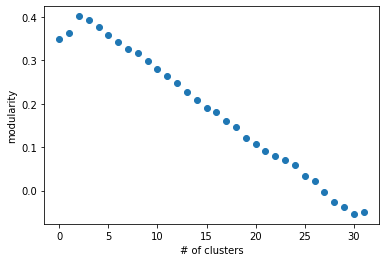

In [23]:
#Plot modularity
plt.plot(modularity, 'o')
plt.xlabel('# of clusters')
plt.ylabel('modularity')
plt.show()

### Example

In [71]:
result = nxcom.girvan_newman(G_karate)
communities = next(result)
len(communities)

2

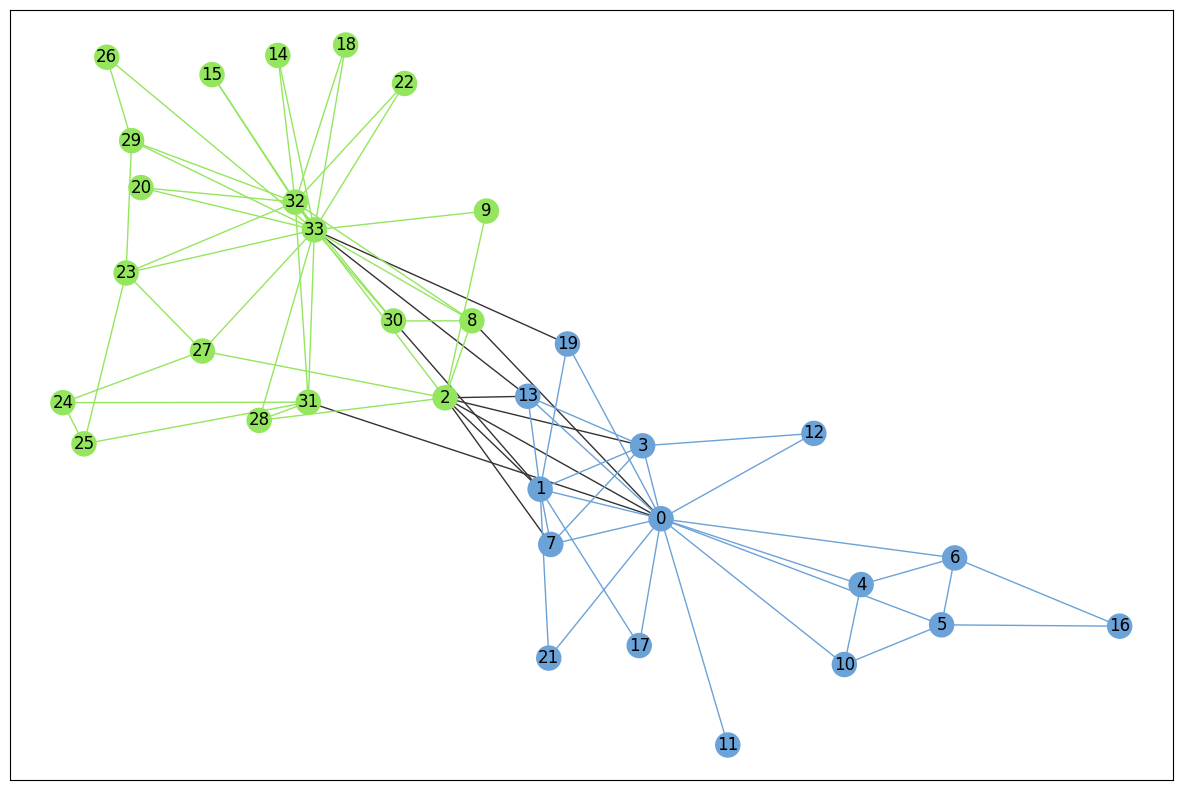

In [72]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

karate_pos = nx.spring_layout(G_karate)
# Draw external edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)
plt.show()

### Example

So at each step, the most valuable edge is removed, defined as the edge with the highest betweenness centrality, and the connected components are found. So roughly the complexity is of the order of the number of edges times the complexity of the connected components algorithm and the highest betweenness centrality.

The docs mention some approaches to slice the returned generator and keep the first k tuples of communities. Here's one if you want to run the algorithm up to the kth iteration:


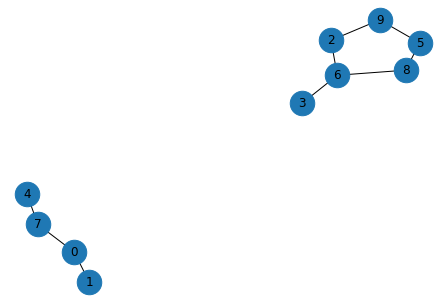

In [46]:
from itertools import islice, takewhile
from networkx.algorithms.community.centrality import girvan_newman

G = nx.fast_gnp_random_graph(10, 0.2)
nx.draw(G, with_labels=True, node_size=600)

In [42]:
k = 2
comp = girvan_newman(G)
for communities in islice(comp, k):
    print(tuple(sorted(c) for c in communities))

([0], [1, 2, 3, 4, 5, 6, 7, 8, 9])
([0], [1], [2, 3, 4, 5, 6, 7, 8, 9])


### Facebook example

We’ll use the dataset from SNAP; J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012.

source: https://snap.stanford.edu/data/ego-Facebook.html

In [23]:
import networkx.algorithms.community as nxcom
data_path = 'C:/projects/datasets/facebook_combined.txt'
G_social = nx.read_edgelist(data_path)

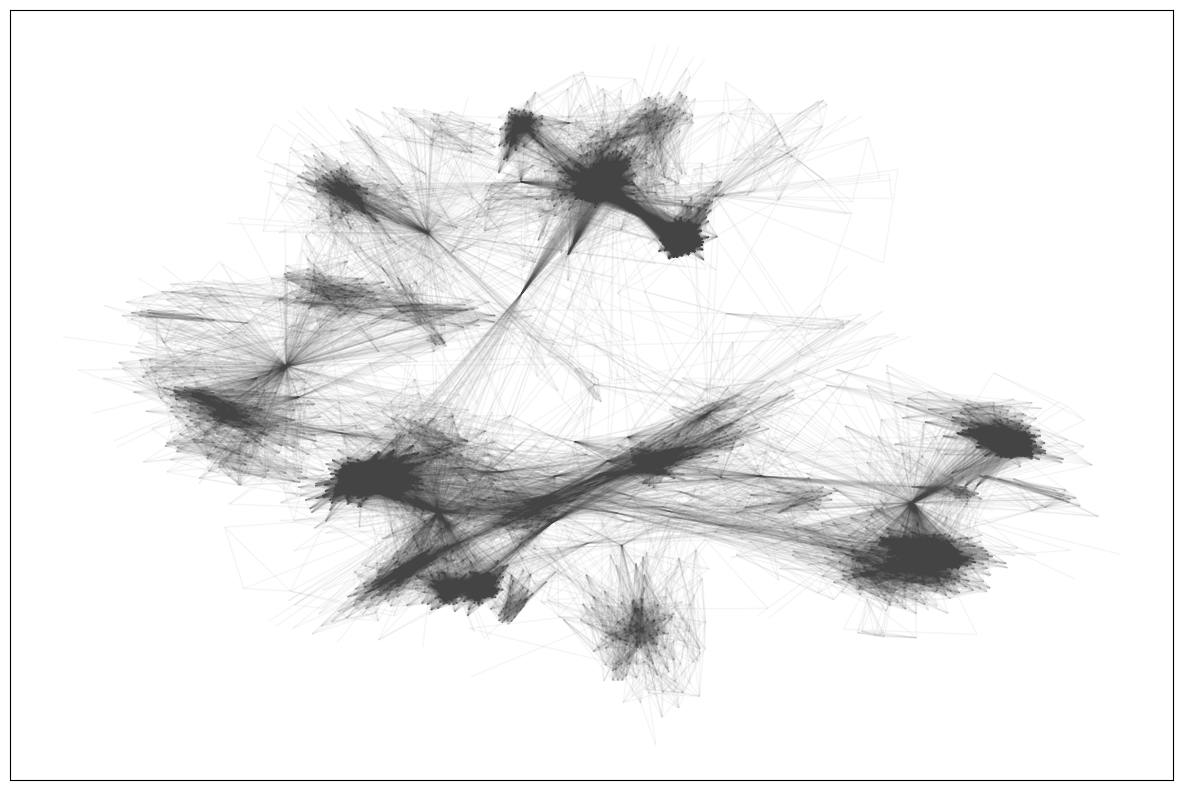

In [24]:
# To get an idea, let’s render it:

pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edge_color="#444444",
    alpha=0.05, 
    with_labels=False)
plt.show()

In [25]:
print(nx.info(G_social))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


There are 13 communities in this network:

In [26]:
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

13

and like above we can render them with the same utility methods

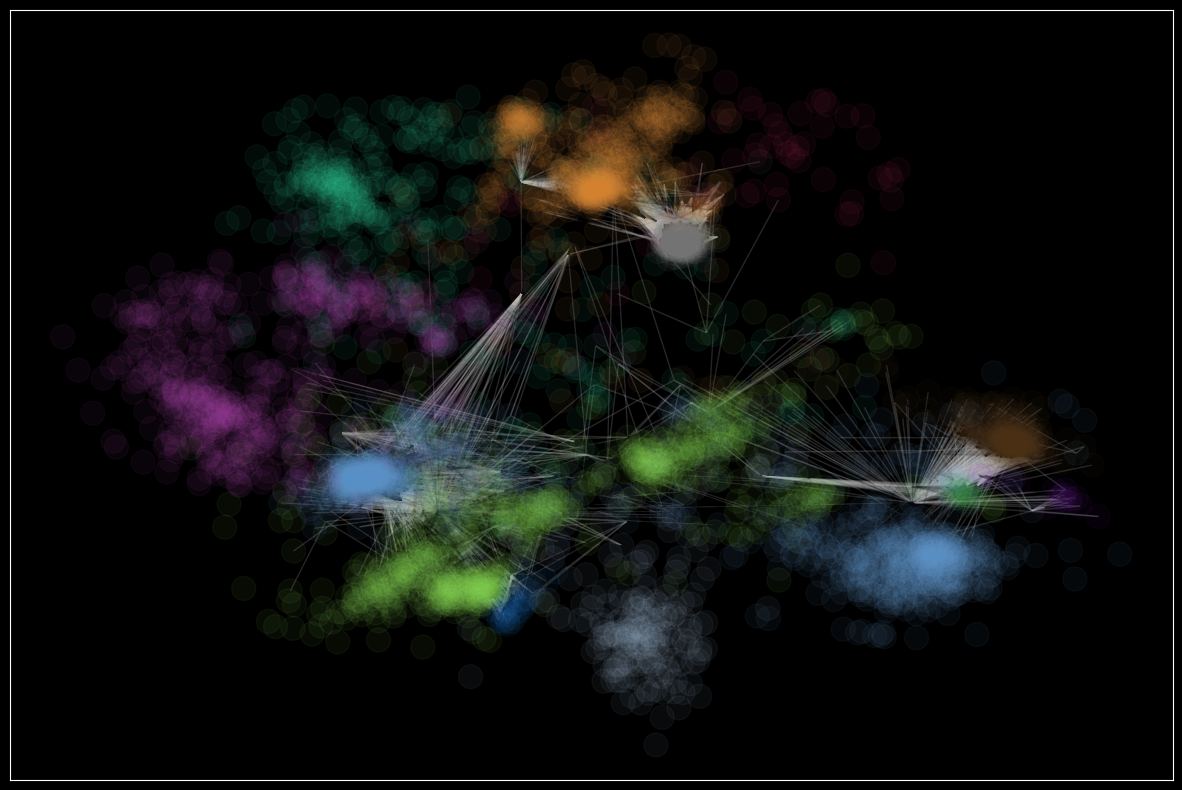

In [27]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]
# external edges
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edgelist=external, 
    edge_color="silver",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# internal edges
nx.draw_networkx(
    G_social, pos=pos, 

    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)
plt.show()

### Example

In [30]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities
import matplotlib.pyplot as plt

In [31]:
tG = nx.read_edgelist('C:/projects/datasets/Forsquare and Twitter networks/tedges.txt')

In [32]:
communities = list(k_clique_communities(tG, 3))

In [33]:
%matplotlib inline

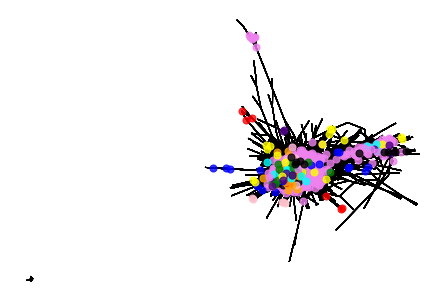

In [34]:
pos = nx.spring_layout(tG)
colors = ["violet", "black", "orange", "cyan", "blue", "green", "yellow", "indigo", "pink", "red"]
for i in range(len(communities)):
    graph = communities[i]
    node_list = [node for node in graph]
    nx.draw(tG, pos, nodelist=node_list, node_color=colors[i%10], node_size=50, alpha=0.8)

In [35]:
# From SO: https://stackoverflow.com/questions/40941264/how-to-draw-a-small-graph-with-community-structure-in-networkx
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [36]:
dict_communities = {}

for i, c in enumerate(communities):
    for node in c:
        dict_communities[node] = i + 1
        
for node in tG:
    if node not in dict_communities.keys():
        dict_communities[node] = -1

In [37]:
pos = community_layout(tG, dict_communities)

In [38]:
from matplotlib import cm
colors = []
for node in tG.nodes:
    colors.append(cm.Set1(dict_communities[node]))

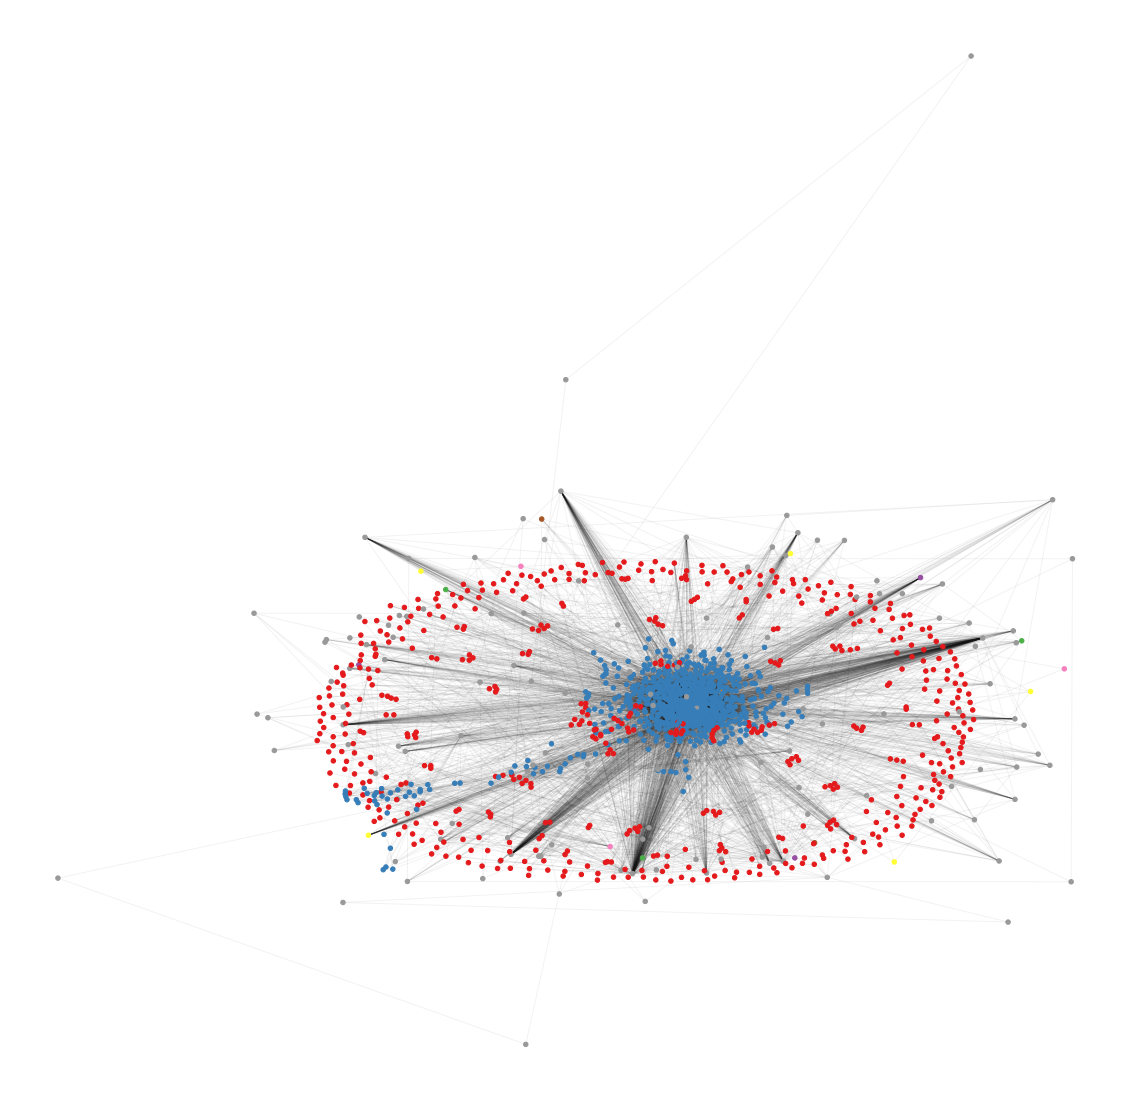

In [39]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(tG, pos, node_color=colors, node_size=20)
nx.draw_networkx_edges(tG, pos, alpha=0.05)
plt.axis('off')
plt.show()

In [40]:
from networkx import edge_betweenness_centrality
from random import random

def most_valuable_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e: c / max_cent for e, c in centrality.items()}
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)

In [41]:
gn_generator = girvan_newman(tG, most_valuable_edge)

In [ ]:
from itertools import islice
gn_communities = next(islice(gn_generator, 3, None)) # Do 3 iterations only

In [ ]:
type(gn_communities)

In [ ]:
gn_dict_communities = {}

for i, c in enumerate(gn_communities):
    print ("Community {}".format(i))
    for node in c:
        gn_dict_communities[node] = i + 1
        
for node in tG:
    if node not in gn_dict_communities.keys():
        gn_dict_communities[node] = -1

In [ ]:
gn_pos = community_layout(tG, gn_dict_communities)

In [ ]:
from matplotlib import cm
gn_colors = []
for node in tG.nodes:
    gn_colors.append(cm.Set1(gn_dict_communities[node]))

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(tG, gn_pos, node_color=gn_colors, node_size=20)
nx.draw_networkx_edges(tG, gn_pos, alpha=0.05)
plt.axis('off')
plt.show()

### Example

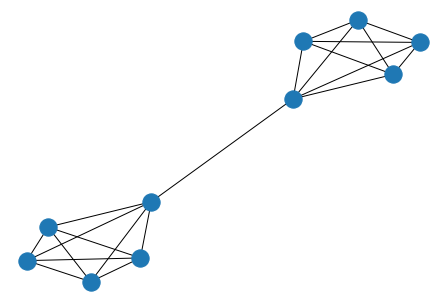

In [57]:
def edge_to_remove(g):
      
    d1 = nx.edge_betweenness_centrality(g)
    list_of_tuples = list(d1.items())
      
    sorted(list_of_tuples, key = lambda x:x[1], reverse = True)
      
    # Will return in the form (a,b)
    return list_of_tuples[0][0]
  
def girvan(g):
    a = nx.connected_components(g)
    lena = len(list(a))
    print (' The number of connected components are ', lena)
    while (lena == 1):
  
        # We need (a,b) instead of ((a,b))
        u, v = edge_to_remove(g)
        g.remove_edge(u, v) 
          
        a = nx.connected_components(g)
        lena=len(list(a))
        print (' The number of connected components are ', lena)
    
    return a
  
# Driver Code
g = nx.barbell_graph(5,0)
nx.draw(g)

In [58]:
a = girvan(g)
print ('Barbell Graph')
  
for i in a:
    print (i.nodes())
    print ('.............')
  
g1 = nx.karate_club_graph()
a1 = girvan(g1)
  
print ('Karate Club Graph')
for i in a1:
    print (i.nodes())
    print ('.............')

 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  2
Barbell Graph
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  1
 The number of connected components are  2
Karate Club Graph


### Example

To get the first pair of communities:

In [17]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

G = nx.path_graph(10)
comp = girvan_newman(G)
tuple(sorted(c) for c in next(comp))

([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])

In [18]:
# To get only the first k tuples of communities, use itertools.islice():
import itertools
G = nx.path_graph(8)
k = 2
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

([0, 1, 2, 3], [4, 5, 6, 7])
([0, 1], [2, 3], [4, 5, 6, 7])


To stop getting tuples of communities once the number of communities is greater than k, use itertools.takewhile():

In [19]:
import itertools
G = nx.path_graph(8)
k = 4
comp = girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities))

([0, 1, 2, 3], [4, 5, 6, 7])
([0, 1], [2, 3], [4, 5, 6, 7])
([0, 1], [2, 3], [4, 5], [6, 7])


To just choose an edge to remove based on the weight:

In [20]:
from operator import itemgetter
G = nx.path_graph(10)
edges = G.edges()
nx.set_edge_attributes(G, {(u, v): v for u, v in edges}, "weight")
def heaviest(G):
    u, v, w = max(G.edges(data="weight"), key=itemgetter(2))
    return (u, v)

comp = girvan_newman(G, most_valuable_edge=heaviest)
tuple(sorted(c) for c in next(comp))

([0, 1, 2, 3, 4, 5, 6, 7, 8], [9])

To utilize edge weights when choosing an edge with, for example, the highest betweenness centrality:

In [21]:
from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    return max(centrality, key=centrality.get)

G = nx.path_graph(10)
comp = girvan_newman(G, most_valuable_edge=most_central_edge)
tuple(sorted(c) for c in next(comp))

([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])

To specify a different ranking algorithm for edges, use the most_valuable_edge keyword argument:

In [22]:
from networkx import edge_betweenness_centrality
from random import random

def most_central_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e: c / max_cent for e, c in centrality.items()}
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)

G = nx.path_graph(10)
comp = girvan_newman(G, most_valuable_edge=most_central_edge)

### 2. Modularity maximization

Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

This function uses Clauset-Newman-Moore greedy modularity maximization

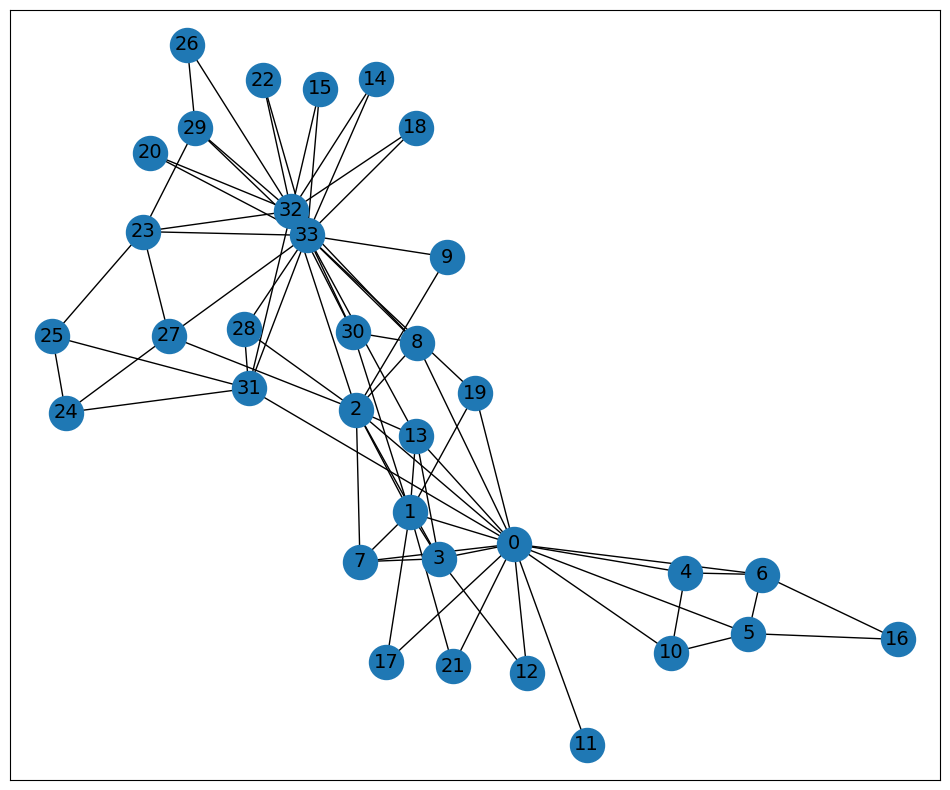

In [76]:
plt.figure(7,figsize=(12,10))
nx.draw_networkx(G_karate,node_size=600,font_size=14)

In [77]:
community.greedy_modularity_communities(G)

[frozenset({3, 5, 6, 9}),
 frozenset({1, 7, 8}),
 frozenset({0, 4}),
 frozenset({2})]

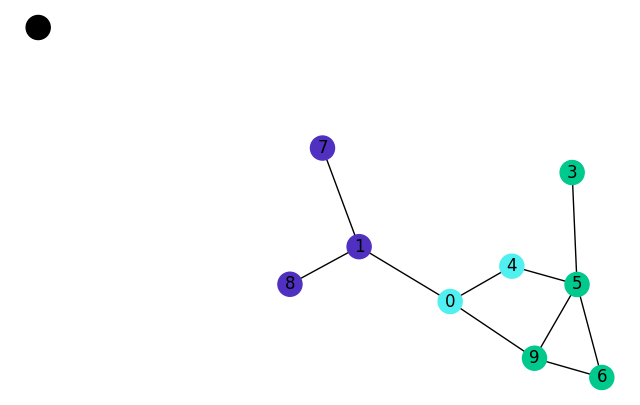

In [83]:
#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_b = community.greedy_modularity_communities(G)
keys = G.nodes()
values = "black"
counter = 0
plt.figure(7,figsize=(8,5))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

### 3. Label propagation

**The Label Propagation algorithm (LPA) is a fast algorithm for finding communities in a graph. It detects these communities using network structure alone as its guide, and doesn’t require a pre-defined objective function or prior information about the communities.**

LPA works by propagating labels throughout the network and forming communities based on this process of label propagation.

The intuition behind the algorithm is that a single label can quickly become dominant in a densely connected group of nodes, but will have trouble crossing a sparsely connected region. Labels will get trapped inside a densely connected group of nodes, and those nodes that end up with the same label when the algorithms finish can be considered part of the same community.

The algorithm works as follows:

1. Every node is initialized with a unique community label (an identifier).
2. These labels propagate through the network.
3. At every iteration of propagation, each node updates its label to the one that the maximum numbers of its neighbours belongs to. Ties are broken arbitrarily but deterministically.
4. LPA reaches convergence when each node has the majority label of its neighbours.
5. LPA stops if either convergence, or the user-defined maximum number of iterations is achieved.

As labels propagate, densely connected groups of nodes quickly reach a consensus on a unique label. At the end of the propagation only a few labels will remain - most will have disappeared. Nodes that have the same community label at convergence are said to belong to the same community.

One interesting feature of LPA is that nodes can be assigned preliminary labels to narrow down the range of solutions generated. This means that it can be used as semi-supervised way of finding communities where we hand-pick some initial communities.


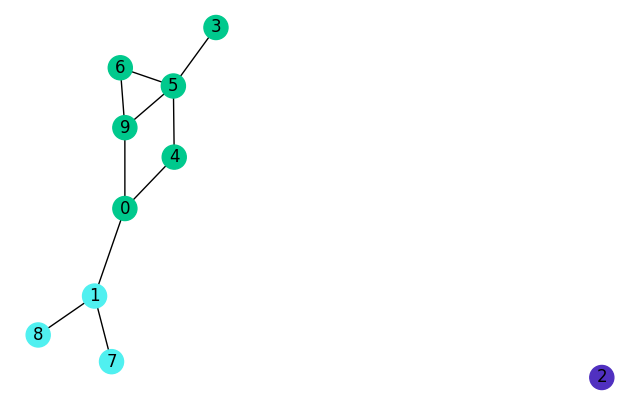

In [85]:
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_m = community.label_propagation_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for c in lst_m:
  for n in c:
    color_map_b[n] = colors[counter]
  counter = counter + 1
plt.figure(7,figsize=(8,5))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

### 4. Fast community unfolding (Louvian)

The inspiration for this method of community detection is the optimization of modularity as the algorithm progresses. Modularity is a scale value between −0.5 (non-modular clustering) and 1 (fully modular clustering) that measures the relative density of edges inside communities with respect to edges outside communities. Optimizing this value theoretically results in the best possible grouping of the nodes of a given network. But because going through all possible iterations of the nodes into groups is impractical, heuristic algorithms are used.

In the Louvain Method of community detection, first small communities are found by optimizing modularity locally on all nodes, then each small community is grouped into one node and the first step is repeated. The method is similar to the earlier method by Clauset, Newman and Moore[3] that connects communities whose amalgamation produces the largest increase in modularity. 

soruce: https://arxiv.org/abs/0803.0476

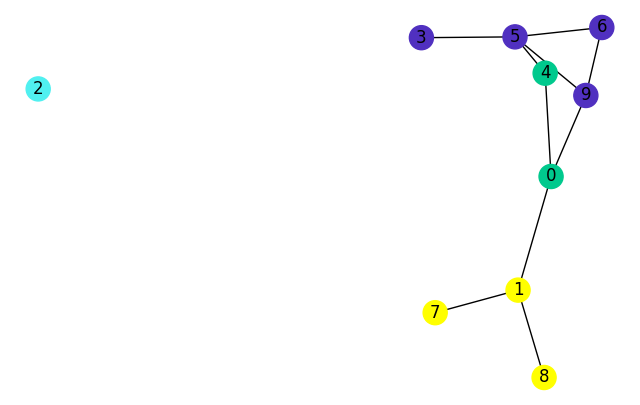

In [87]:
colors = ["#00C98D", "#5030C0", "#50F0F0", 'yellow']
pos = nx.spring_layout(G)
lst_m = community_louvain.best_partition(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values

for n in dict(lst_m):
  color_map_b[n] = colors[lst_m[n]]

plt.figure(7,figsize=(8,5))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

### 5. Walktrap

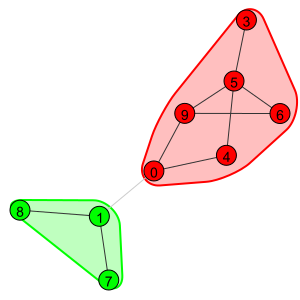

In [88]:
g = ig.Graph.TupleList(G.edges(), directed=False)

wtrap = g.community_walktrap(steps = 4)
clust = wtrap.as_clustering()
ig.plot(clust, mark_groups = True, bbox=(300,300), vertex_label=g.vs['name'])

### 6. k-clique community

In [89]:
def find_community(graph,k):
    return list(community.k_clique_communities(graph,k))

for k in range(2,10):
        print ("############# k-Clique: %d ################" % k)
        rst_com = find_community(G,k)
        print ("Count of Community being found：%d" % len(rst_com))
        print(rst_com)

############# k-Clique: 2 ################
Count of Community being found：1
[frozenset({0, 1, 3, 4, 5, 6, 7, 8, 9})]
############# k-Clique: 3 ################
Count of Community being found：1
[frozenset({9, 5, 6})]
############# k-Clique: 4 ################
Count of Community being found：0
[]
############# k-Clique: 5 ################
Count of Community being found：0
[]
############# k-Clique: 6 ################
Count of Community being found：0
[]
############# k-Clique: 7 ################
Count of Community being found：0
[]
############# k-Clique: 8 ################
Count of Community being found：0
[]
############# k-Clique: 9 ################
Count of Community being found：0
[]


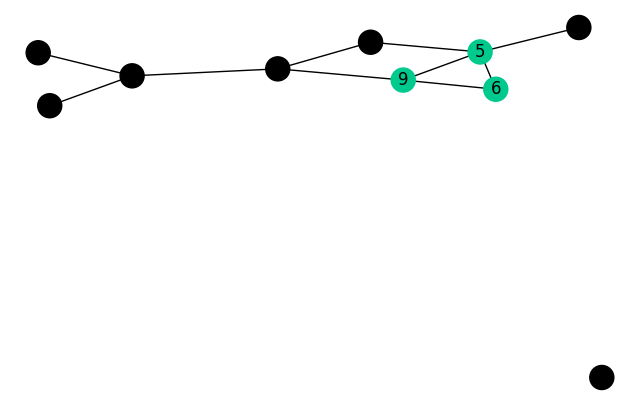

In [91]:
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_m = community.k_clique_communities(G, 3)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for c in lst_m:
  for n in c:
    color_map_b[n] = colors[counter]
  counter = counter + 1
plt.figure(7,figsize=(8,5))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()